In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install livelossplot==0.1.2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os,cv2,itertools 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from livelossplot import PlotLossesKeras 

!pip install np_utils

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
!pip install scikit-learn

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

ROWS = 64
COLS = 64
CHANNELS = 3 #RGB

In [5]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [6]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS,COLS), interpolation = cv2.INTER_CUBIC)

In [7]:
def prep_data(images):
    m = len(images)
    n_x = ROWS*COLS*CHANNELS
    
    X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype = np.uint8)
    y = np.zeros((m,1))
    print("X.shape is{}".format(X.shape))
    
    for i,image_file in enumerate(images):
        image = read_image(image_file)
        X[i,:] = np.squeeze(image.reshape((ROWS,COLS,CHANNELS)))
        if 'dog' in image_file.lower():
            y[i,0] = 1
        elif 'cat' in image_file.lower():
            y[i,0] = 0
        else:
            y[i,0] = image_file.split('/')[-1].split('.')[0]
            
        if i%5000 == 0:
            print("Proceed {} of {}".format(i,m))
        
    return X,y

In [8]:
X_train, y_train = prep_data(train_images)
X_test, y_test = prep_data(test_images)

X.shape is(25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is(12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [9]:
print("Train shape{}".format(X_train.shape))
print("Test shape{}".format(X_test.shape))

Train shape(25000, 64, 64, 3)
Test shape(12500, 64, 64, 3)


In [10]:
X, y = prep_data(train_images)

X.shape is(25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000


In [11]:
X, y = shuffle(X, y)

In [12]:
X.shape

(25000, 64, 64, 3)

In [13]:
y.shape

(25000, 1)

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [15]:
X_train.shape

(20000, 64, 64, 3)

In [16]:
X_val.shape

(5000, 64, 64, 3)

# Converting to one-hot vector representation

In [17]:
y_train_one_hot = to_categorical(y_train)

In [18]:
y_train_one_hot.shape

(20000, 2)

In [19]:
y_val_one_hot = to_categorical(y_val)

In [20]:
y_val_one_hot.shape

(5000, 2)

In [21]:
classes = {0:'cat',
          1:'dog'}

In [22]:
def show_images(X,y,idx):
    image = X[idx]
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is a {}".format(classes[y[idx,0]]))
    print(y[idx,0])
    plt.show()

0.0


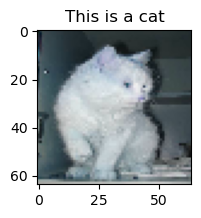

In [23]:
show_images(X_train,y_train,2)

In [24]:
X_train_norm = X_train/255
X_val_norm = X_val/255

In [25]:
X_train_norm[0]

array([[[0.44705882, 0.39215686, 0.33333333],
        [0.45098039, 0.39215686, 0.38431373],
        [0.51372549, 0.47058824, 0.47058824],
        ...,
        [0.25490196, 0.54509804, 0.75686275],
        [0.24705882, 0.55294118, 0.76078431],
        [0.21568627, 0.54117647, 0.74509804]],

       [[0.47058824, 0.36862745, 0.31372549],
        [0.47058824, 0.38823529, 0.38431373],
        [0.50196078, 0.4627451 , 0.4627451 ],
        ...,
        [0.22352941, 0.53333333, 0.74117647],
        [0.24705882, 0.54117647, 0.74901961],
        [0.19607843, 0.49411765, 0.70196078]],

       [[0.47058824, 0.40784314, 0.35294118],
        [0.4627451 , 0.38039216, 0.37254902],
        [0.54901961, 0.46666667, 0.4745098 ],
        ...,
        [0.25098039, 0.56470588, 0.77254902],
        [0.25882353, 0.55686275, 0.76470588],
        [0.24313725, 0.5254902 , 0.7372549 ]],

       ...,

       [[0.34117647, 0.51764706, 0.65098039],
        [0.34901961, 0.5254902 , 0.65882353],
        [0.3372549 , 0

In [26]:
X_train_norm.shape

(20000, 64, 64, 3)

In [27]:
X_val_norm[0]

array([[[0.50196078, 0.51764706, 0.52156863],
        [0.49803922, 0.51372549, 0.51764706],
        [0.50196078, 0.52156863, 0.51764706],
        ...,
        [0.50196078, 0.54901961, 0.56470588],
        [0.49803922, 0.54509804, 0.56078431],
        [0.49411765, 0.54117647, 0.55686275]],

       [[0.49803922, 0.51372549, 0.51764706],
        [0.50196078, 0.51764706, 0.52156863],
        [0.50196078, 0.52156863, 0.51764706],
        ...,
        [0.50588235, 0.55294118, 0.56862745],
        [0.49803922, 0.54509804, 0.56078431],
        [0.49803922, 0.54509804, 0.56078431]],

       [[0.49411765, 0.50980392, 0.51372549],
        [0.50196078, 0.51764706, 0.52156863],
        [0.50196078, 0.52156863, 0.51764706],
        ...,
        [0.50980392, 0.55294118, 0.56862745],
        [0.50588235, 0.55294118, 0.56862745],
        [0.50196078, 0.54901961, 0.56470588]],

       ...,

       [[0.5372549 , 0.59215686, 0.58431373],
        [0.59607843, 0.63921569, 0.63137255],
        [0.65098039, 0

In [28]:
X_val_norm.shape

(5000, 64, 64, 3)

0.0


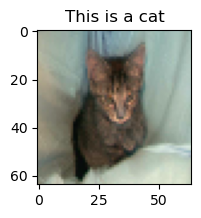

In [29]:
show_images(X_train_norm,y_train,6)

# Model Architecture and Training of Model ( Question 1)

## Initially I am training the model with 4 layers in the convolutional layer by maxpooling them with a pool_size of 2 by 2, and in the convolutional layer I used the activation function 'relu' and flattened the output of the convolutional layer and then passed it through 2 dense layers and the model is compiled without using any optimizer.

In [30]:
model1 = Sequential()

model1.add(Conv2D(32,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.6))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dropout(0.6))

model1.add(Dense(units=120,activation='relu'))
model1.add(Dense(units=2,activation='sigmoid'))

In [31]:
model1.compile(loss='binary_crossentropy',metrics=['accuracy'])

# All the Parameters used in the above cnn are mentioned below

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

# The model is fit without using any optimizer

In [33]:
history1 = model1.fit(X_train_norm,y_train_one_hot,validation_data=(X_val_norm,y_val_one_hot),epochs=20,batch_size=6)

Epoch 1/20
3334/3334 [==============================] - 32s 9ms/step - loss: 0.6711 - accuracy: 0.5939 - val_loss: 0.6613 - val_accuracy: 0.5632
Epoch 2/20
3334/3334 [==============================] - 25s 7ms/step - loss: 0.6193 - accuracy: 0.6715 - val_loss: 0.5810 - val_accuracy: 0.6840
Epoch 3/20
3334/3334 [==============================] - 26s 8ms/step - loss: 0.5952 - accuracy: 0.7042 - val_loss: 0.5665 - val_accuracy: 0.6900
Epoch 4/20
3334/3334 [==============================] - 25s 7ms/step - loss: 0.5897 - accuracy: 0.7163 - val_loss: 0.6448 - val_accuracy: 0.6016
Epoch 5/20
3334/3334 [==============================] - 23s 7ms/step - loss: 0.5965 - accuracy: 0.7143 - val_loss: 0.5910 - val_accuracy: 0.6352
Epoch 6/20
3334/3334 [==============================] - 23s 7ms/step - loss: 0.5989 - accuracy: 0.7125 - val_loss: 0.6309 - val_accuracy: 0.5970
Epoch 7/20
3334/3334 [==============================] - 25s 7ms/step - loss: 0.6249 - accuracy: 0.6992 - val_loss: 0.6004 - val_ac

# without an optimizer the cnn model gives training accuracy of 50% and val_accuracy of 50%

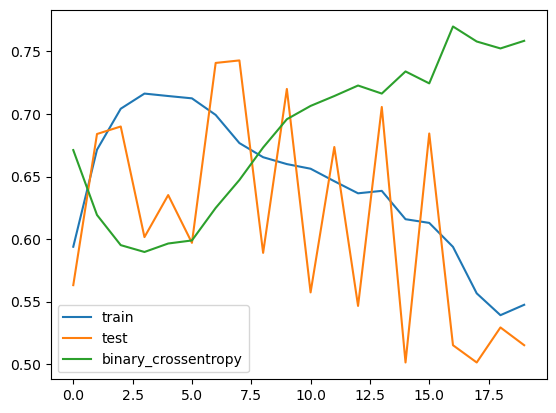

In [34]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.plot(history1.history['loss'],label='binary_crossentropy')
plt.legend()
plt.show()

# 2 Block VGG Model

In [35]:
model2 = Sequential()

model2.add(Conv2D(32,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Flatten())

model2.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(units=2,activation='sigmoid'))

In [36]:
model2.compile(loss='binary_crossentropy',metrics=['accuracy'])

# Parameters used for VGG model

In [37]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

# CNN Model is fit with VGG Model

In [38]:
history2 = model2.fit(X_train_norm,y_train_one_hot,validation_data=(X_val_norm,y_val_one_hot),epochs=20,batch_size=6)

Epoch 1/20
3334/3334 [==============================] - 50s 15ms/step - loss: 0.5999 - accuracy: 0.6924 - val_loss: 0.5662 - val_accuracy: 0.7286
Epoch 2/20
3334/3334 [==============================] - 51s 15ms/step - loss: 0.5225 - accuracy: 0.7553 - val_loss: 0.5800 - val_accuracy: 0.7408
Epoch 3/20
3334/3334 [==============================] - 45s 13ms/step - loss: 0.4925 - accuracy: 0.7758 - val_loss: 0.6108 - val_accuracy: 0.7340
Epoch 4/20
3334/3334 [==============================] - 50s 15ms/step - loss: 0.4806 - accuracy: 0.7857 - val_loss: 0.5569 - val_accuracy: 0.7606
Epoch 5/20
3334/3334 [==============================] - 44s 13ms/step - loss: 0.4759 - accuracy: 0.7923 - val_loss: 0.5386 - val_accuracy: 0.7392
Epoch 6/20
3334/3334 [==============================] - 44s 13ms/step - loss: 0.4658 - accuracy: 0.7971 - val_loss: 0.5241 - val_accuracy: 0.7470
Epoch 7/20
3334/3334 [==============================] - 46s 14ms/step - loss: 0.4646 - accuracy: 0.7993 - val_loss: 0.4733 -

# The CNN with VGG Model gives a training accuracy of 82% and val_accuracy of 80%

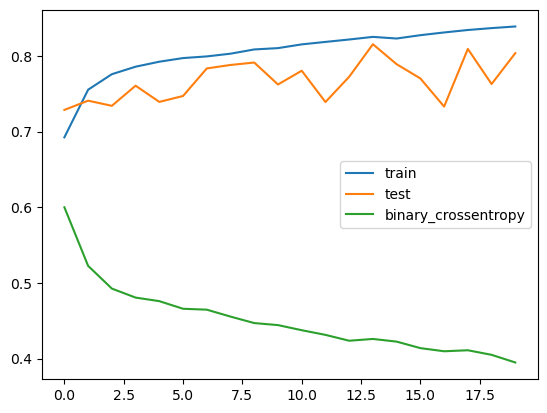

In [39]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.plot(history2.history['loss'],label='binary_crossentropy')
plt.legend()
plt.show()

# (Question 2) CNN Model with batch normalization and optimizer

In [40]:
model3 = Sequential()

model3.add(Conv2D(32,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(64,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(BatchNormalization())
model3.add(Flatten())

model3.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(units=2,activation='sigmoid'))

In [41]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                      

In [42]:
history3 = model3.fit(X_train_norm,y_train_one_hot,validation_data=(X_val_norm,y_val_one_hot),epochs=20,batch_size=6)

Epoch 1/20
3334/3334 [==============================] - 42s 12ms/step - loss: 0.6045 - accuracy: 0.6755 - val_loss: 0.5464 - val_accuracy: 0.7308
Epoch 2/20
3334/3334 [==============================] - 39s 12ms/step - loss: 0.4784 - accuracy: 0.7713 - val_loss: 0.4883 - val_accuracy: 0.7626
Epoch 3/20
3334/3334 [==============================] - 39s 12ms/step - loss: 0.4099 - accuracy: 0.8097 - val_loss: 0.4498 - val_accuracy: 0.7992
Epoch 4/20
3334/3334 [==============================] - 42s 13ms/step - loss: 0.3469 - accuracy: 0.8446 - val_loss: 0.4804 - val_accuracy: 0.8064
Epoch 5/20
3334/3334 [==============================] - 40s 12ms/step - loss: 0.2958 - accuracy: 0.8708 - val_loss: 0.9155 - val_accuracy: 0.6952
Epoch 6/20
3334/3334 [==============================] - 40s 12ms/step - loss: 0.2503 - accuracy: 0.8894 - val_loss: 0.5810 - val_accuracy: 0.7980
Epoch 7/20
3334/3334 [==============================] - 38s 11ms/step - loss: 0.2043 - accuracy: 0.9130 - val_loss: 0.7434 -

# CNN Model fit with optmizer and batch normalization gives a training accuracy of 98% and val_accuracy of 79%

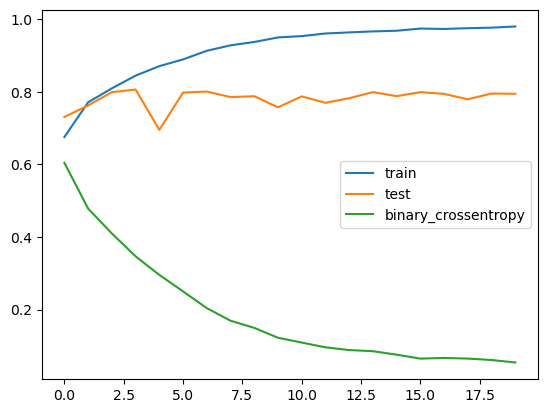

In [43]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.plot(history3.history['loss'],label='binary_crossentropy')
plt.legend()
plt.show()

# Question 3

# Running the model by changing epochs to 5

In [44]:
model4 = Sequential()

model4.add(Conv2D(32,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(64,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(BatchNormalization())
model4.add(Flatten())

model4.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(units=2,activation='sigmoid'))

In [45]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [46]:
history4 = model4.fit(X_train_norm,y_train_one_hot,validation_data=(X_val_norm,y_val_one_hot),epochs=5,batch_size=6)

Epoch 1/5
3334/3334 [==============================] - 41s 12ms/step - loss: 0.6007 - accuracy: 0.6791 - val_loss: 0.5298 - val_accuracy: 0.7438
Epoch 2/5
3334/3334 [==============================] - 39s 12ms/step - loss: 0.4840 - accuracy: 0.7637 - val_loss: 0.4930 - val_accuracy: 0.7668
Epoch 3/5
3334/3334 [==============================] - 40s 12ms/step - loss: 0.4228 - accuracy: 0.8045 - val_loss: 0.4629 - val_accuracy: 0.7858
Epoch 4/5
3334/3334 [==============================] - 35s 10ms/step - loss: 0.3664 - accuracy: 0.8361 - val_loss: 0.4624 - val_accuracy: 0.7986
Epoch 5/5
3334/3334 [==============================] - 40s 12ms/step - loss: 0.3160 - accuracy: 0.8634 - val_loss: 0.5651 - val_accuracy: 0.7898


# CNN Model with 5 epochs and optimizer and batch normalization gives training accuracy of % and val_accuracy of %

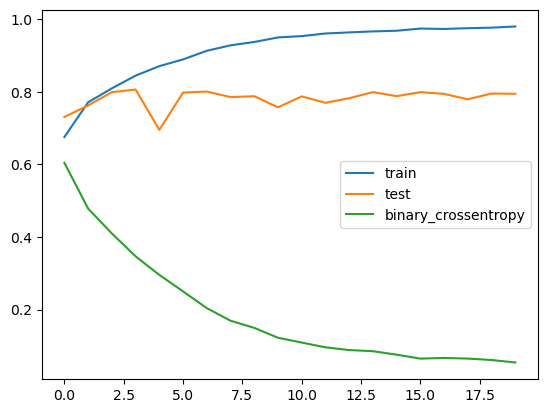

In [47]:
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.plot(history3.history['loss'],label='binary_crossentropy')
plt.legend()
plt.show()

# Running the model by changing epochs to 10

In [48]:
model4 = Sequential()

model4.add(Conv2D(32,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(64,(3,3),input_shape=(ROWS,COLS,CHANNELS),activation='relu',kernel_initializer='he_uniform',padding='same'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(BatchNormalization())
model4.add(Flatten())

model4.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model4.add(Dense(units=2,activation='sigmoid'))

In [49]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

In [50]:
history4 = model4.fit(X_train_norm,y_train_one_hot,validation_data=(X_val_norm,y_val_one_hot),epochs=10,batch_size=6)

Epoch 1/10
3334/3334 [==============================] - 44s 13ms/step - loss: 0.5868 - accuracy: 0.6880 - val_loss: 0.5271 - val_accuracy: 0.7372
Epoch 2/10
3334/3334 [==============================] - 40s 12ms/step - loss: 0.4699 - accuracy: 0.7716 - val_loss: 0.5335 - val_accuracy: 0.7838
Epoch 3/10
3334/3334 [==============================] - 38s 11ms/step - loss: 0.4066 - accuracy: 0.8124 - val_loss: 0.5466 - val_accuracy: 0.7182
Epoch 4/10
3334/3334 [==============================] - 38s 12ms/step - loss: 0.3595 - accuracy: 0.8357 - val_loss: 0.5067 - val_accuracy: 0.7838
Epoch 5/10
3334/3334 [==============================] - 39s 12ms/step - loss: 0.3138 - accuracy: 0.8588 - val_loss: 0.4758 - val_accuracy: 0.8182
Epoch 6/10
3334/3334 [==============================] - 39s 12ms/step - loss: 0.2722 - accuracy: 0.8779 - val_loss: 0.6005 - val_accuracy: 0.7978
Epoch 7/10
3334/3334 [==============================] - 40s 12ms/step - loss: 0.2353 - accuracy: 0.8953 - val_loss: 0.5073 -

# CNN Model with 10 epochs and optimizer and batch normalization gives training accuracy of % and val_accuracy of %

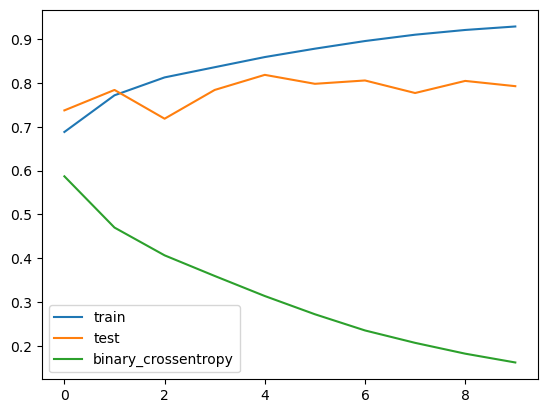

In [51]:
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='test')
plt.plot(history4.history['loss'],label='binary_crossentropy')
plt.legend()
plt.show()

# Testing

In [52]:
image = X_train[0]

In [53]:
test_pred = model3.predict(image.reshape(1, 64, 64, 3))

1/1 [==============================] - 0s 450ms/step


1.0


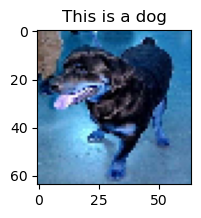

In [54]:
show_images(X_train, y_train,0)

In [55]:
print("Our Model Prediction: {}".format(test_pred))

Our Model Prediction: [[0. 1.]]


In [56]:
def show_image_prediction(X,idx,model):
    img = X[idx].reshape(1,64,64,3)
    img_class = model.predict(img)
    print("Test Prediction {}".format(img_class))
    img = img.reshape((ROWS,COLS,CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(img)
    plt.title("Test {} : I think this is {}".format(idx,classes[y[idx,0]]))
    plt.show()

In [57]:
X_test,y_test = prep_data(test_images)
X_test_lr, y_test = X_test, y_test

X.shape is(12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


# Testing the images randomly from X_test

1/1 [==============================] - 0s 18ms/step
Test Prediction [[0. 1.]]


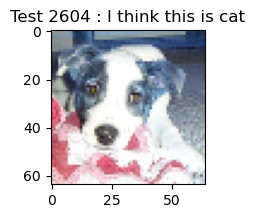

1/1 [==============================] - 0s 15ms/step
Test Prediction [[0. 1.]]


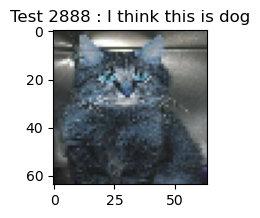

1/1 [==============================] - 0s 11ms/step
Test Prediction [[1. 0.]]


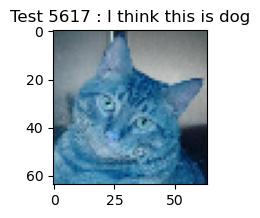

1/1 [==============================] - 0s 15ms/step
Test Prediction [[1. 0.]]


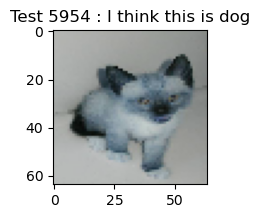

1/1 [==============================] - 0s 9ms/step
Test Prediction [[1. 0.]]


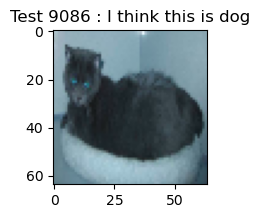

1/1 [==============================] - 0s 11ms/step
Test Prediction [[0. 1.]]


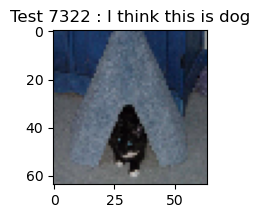

1/1 [==============================] - 0s 9ms/step
Test Prediction [[0. 1.]]


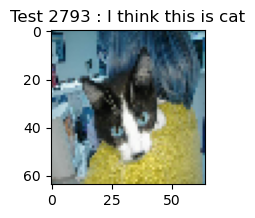

1/1 [==============================] - 0s 9ms/step
Test Prediction [[0. 1.]]


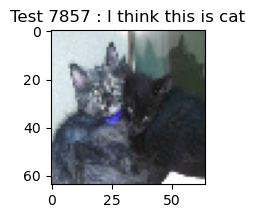

1/1 [==============================] - 0s 16ms/step
Test Prediction [[0. 1.]]


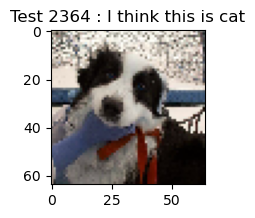

1/1 [==============================] - 0s 9ms/step
Test Prediction [[0. 1.]]


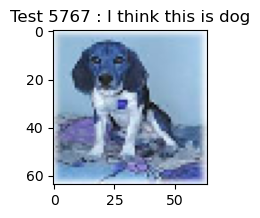

In [58]:
for i in np.random.randint(0,len(X_test_lr),10):
    show_image_prediction(X_test_lr, i, model3)

In [59]:
img1 = X_test[6]
test_pred1 = model3.predict(image.reshape(1,64,64,3))

1/1 [==============================] - 0s 8ms/step


1.0


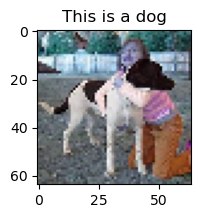

In [60]:
show_images(X_test,y,6)

# The CNN Model accuracy changed a lot when we used VGG Net and Optimizer function and in the testing phase the model somwtimes incorrectly recognized cats for dogs and vice versa, in order to improve the model to reduce such mistakes we need to augment the training data and increase the training dataset so that the model can be trained more and try to avoid such errors during testing